In [1]:
import os
import pandas as pd

df = pd.read_sql_table("metrics", os.environ.get("DB_URL"), parse_dates=["time"])
# df = df.iloc[3:]

df["time"] = pd.date_range(start=df["time"].min(), periods=len(df), freq="2s")

df.set_index("time", inplace=True)
df.head()

,cpu_percent,memory_percent,disk_usage,bytes_sent,bytes_recv
time,,,,,
2024-04-30 12:39:10.242850+00:00,12.1,66.5,5.2,2493178880,1400103936
2024-04-30 12:39:12.242850+00:00,17.5,66.5,5.2,2493416448,1400126464
2024-04-30 12:39:14.242850+00:00,12.0,65.4,5.2,2522651648,1401977856
2024-04-30 12:39:16.242850+00:00,12.9,65.3,5.2,2524461056,1402074112
2024-04-30 12:39:18.242850+00:00,15.0,65.5,5.2,2524593152,1402088448


In [2]:
df.tail(10)

,cpu_percent,memory_percent,disk_usage,bytes_sent,bytes_recv
time,,,,,
2024-04-30 12:42:24.242850+00:00,15.4,66.8,5.2,2547437568,1413022720
2024-04-30 12:42:26.242850+00:00,12.0,67.5,5.2,2547566592,1413036032
2024-04-30 12:42:28.242850+00:00,19.3,67.7,5.2,2547691520,1413042176
2024-04-30 12:42:30.242850+00:00,18.2,67.6,5.2,2547831808,1413063680
2024-04-30 12:42:32.242850+00:00,15.4,67.4,5.2,2548129792,1413069824
2024-04-30 12:42:34.242850+00:00,16.4,69.3,5.2,2932417536,1515808768
2024-04-30 12:42:36.242850+00:00,14.5,68.6,5.2,3461981184,1617793024
2024-04-30 12:42:38.242850+00:00,15.3,68.5,5.2,3462063104,1617795072
2024-04-30 12:42:40.242850+00:00,17.2,68.7,5.2,3462358016,1617820672


In [3]:
len(df)

107

In [4]:
from adtk.data import validate_series

df = validate_series(df)
df.head()

,cpu_percent,memory_percent,disk_usage,bytes_sent,bytes_recv
time,,,,,
2024-04-30 12:39:10.242850+00:00,12.1,66.5,5.2,2493178880,1400103936
2024-04-30 12:39:12.242850+00:00,17.5,66.5,5.2,2493416448,1400126464
2024-04-30 12:39:14.242850+00:00,12.0,65.4,5.2,2522651648,1401977856
2024-04-30 12:39:16.242850+00:00,12.9,65.3,5.2,2524461056,1402074112
2024-04-30 12:39:18.242850+00:00,15.0,65.5,5.2,2524593152,1402088448


[<Axes: >]

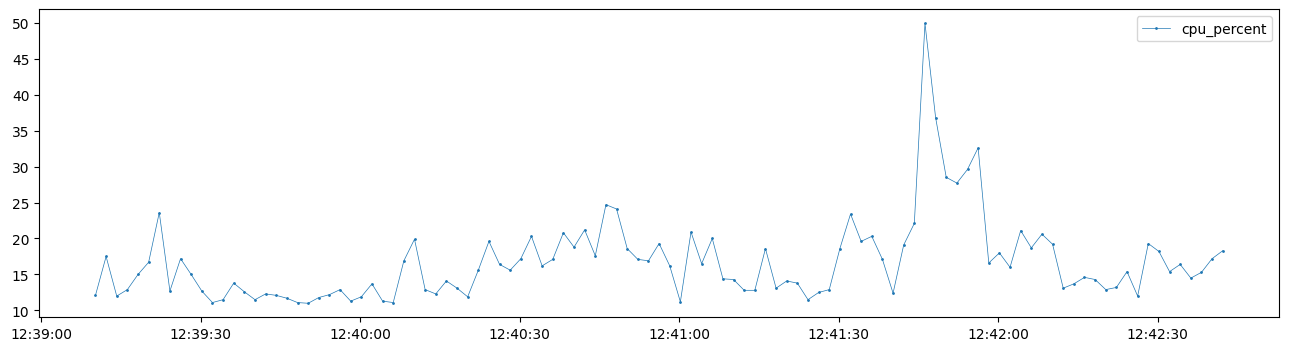

In [5]:
from adtk.visualization import plot
import matplotlib.pyplot as plt
import seaborn as sns

plot(df["cpu_percent"])

[<Axes: >]

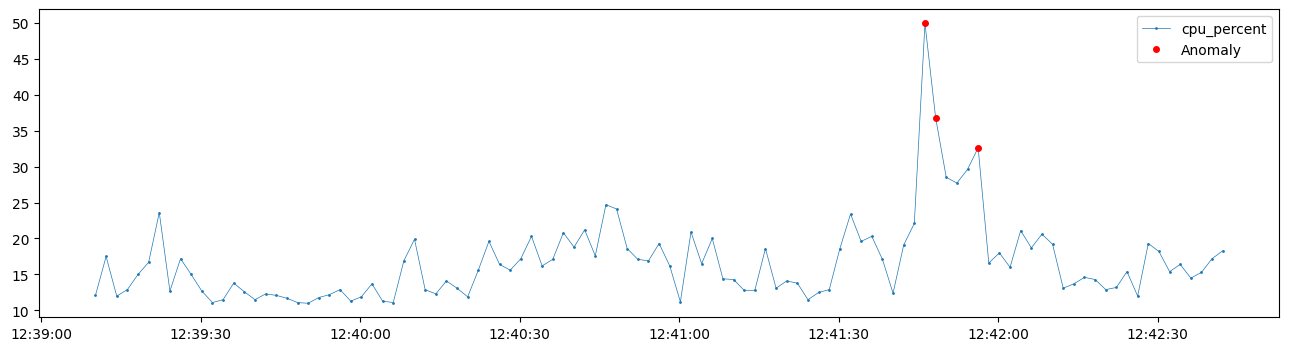

In [6]:
from adtk.detector import SeasonalAD, GeneralizedESDTestAD, QuantileAD, InterQuartileRangeAD

seasonal_ad = GeneralizedESDTestAD()
anomalies = seasonal_ad.fit_detect(df["cpu_percent"])
plot(df["cpu_percent"], anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")